In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

housing = pd.read_csv('Housing_Seattle_2014_15.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Evaluate data types and Nulls
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Investigate summary stats for all columns
housing.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580306e+09,NaN,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,NaN,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
# Update dataset name to preserve original data/
housing_cleaned = housing

# Drop id column as this variable is not needed for modeling
housing_cleaned = housing_cleaned.drop('id', axis = 1)

# Update date column to datetime type
housing_cleaned['date'] = pd.to_datetime(housing_cleaned['date'])

# Convert all numeric columns to float64 (leaving non-numerics alone)
housing_cleaned = housing_cleaned.apply(lambda col: col.astype('float64') if np.issubdtype(col.dtype, np.number) else col)

# Drop rows with missing target or features
housing_cleaned = housing_cleaned.dropna(subset=["price"])

# Fill or drop remaining NaNs
housing_cleaned = housing_cleaned.fillna(0)

In [6]:
# Evaluate data types and Nulls
housing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  float64       
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  float64       
 5   sqft_lot       21613 non-null  float64       
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  float64       
 8   view           21613 non-null  float64       
 9   condition      21613 non-null  float64       
 10  grade          21613 non-null  float64       
 11  sqft_above     21613 non-null  float64       
 12  sqft_basement  21613 non-null  float64       
 13  yr_built       21613 non-null  float64       
 14  yr_renovated   21613 non-null  float64       
 15  zipcode        2161

In [7]:
# Investigate summary stats for all columns
housing_cleaned.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


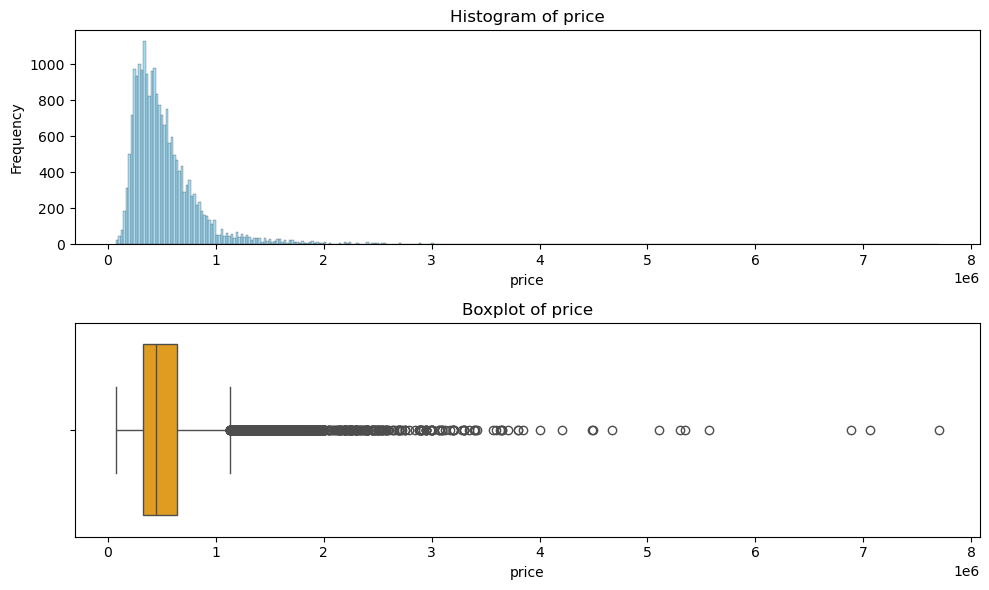

In [22]:
# View boxplots & histograms of price to evaluate for any potential outliers
column = 'price'

plt.figure(figsize = (10, 6))

# Create subplots
ax1 = plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st subplot (histogram)
ax2 = plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd subplot (boxplot)

sns.histplot(housing_cleaned[column], ax = ax1, color = 'skyblue', edgecolor = 'black')
ax1.set_title(f"Histogram of {column}")
ax1.set_xlabel(column)
ax1.set_ylabel("Frequency")

sns.boxplot(x = housing_cleaned[column], ax = ax2, color = 'orange')
ax2.set_title(f"Boxplot of {column}")
ax2.set_xlabel(column)

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

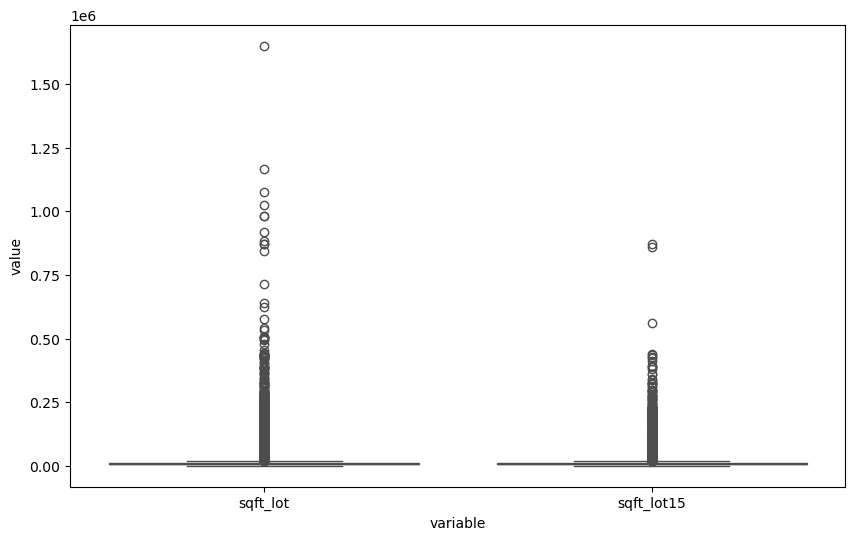

In [24]:
melted_housing = housing_cleaned.melt(value_vars = ['sqft_lot', 'sqft_lot15'])

plt.figure(figsize = (10, 6))

sns.boxplot(x = 'variable', y = 'value', data = melted_housing, color = 'orange')

plt.show()

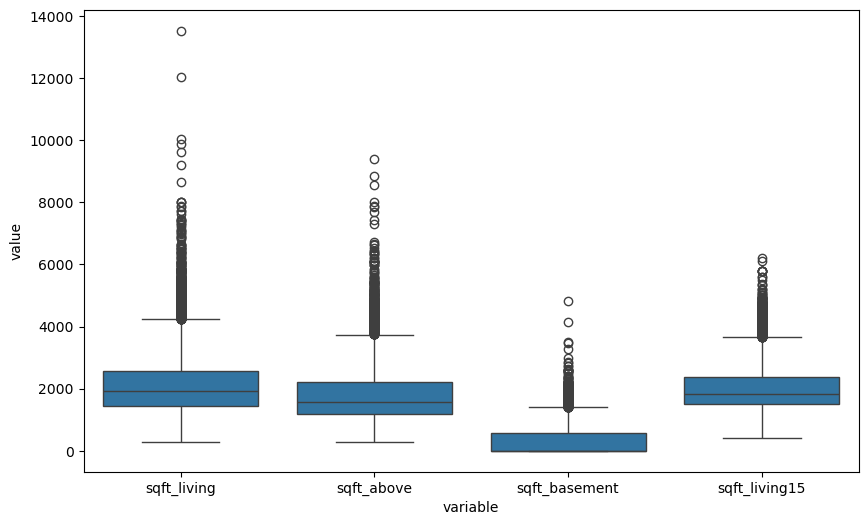

In [26]:
melted_housing = housing_cleaned.melt(value_vars = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15'])
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'variable', y = 'value', data = melted_housing)
plt.show()

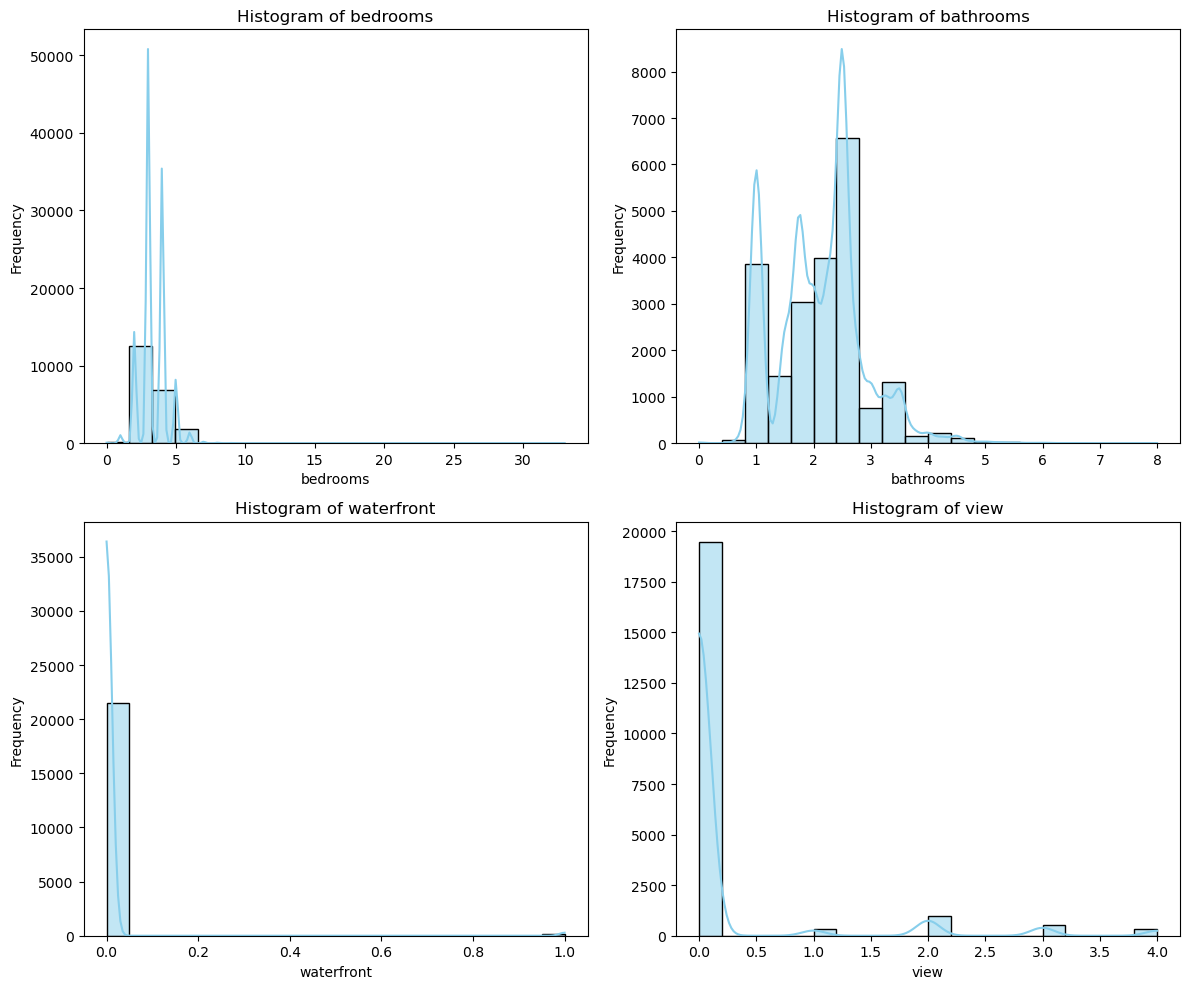

In [28]:
# Visual of bedrooms and bathrooms

columns = ['bedrooms', 'bathrooms', 'waterfront', 'view']

plt.figure(figsize=(12, 10))

for i, col in enumerate(columns):
    ax = plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, subplot index
    sns.histplot(housing_cleaned[col], kde=True, bins=20, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

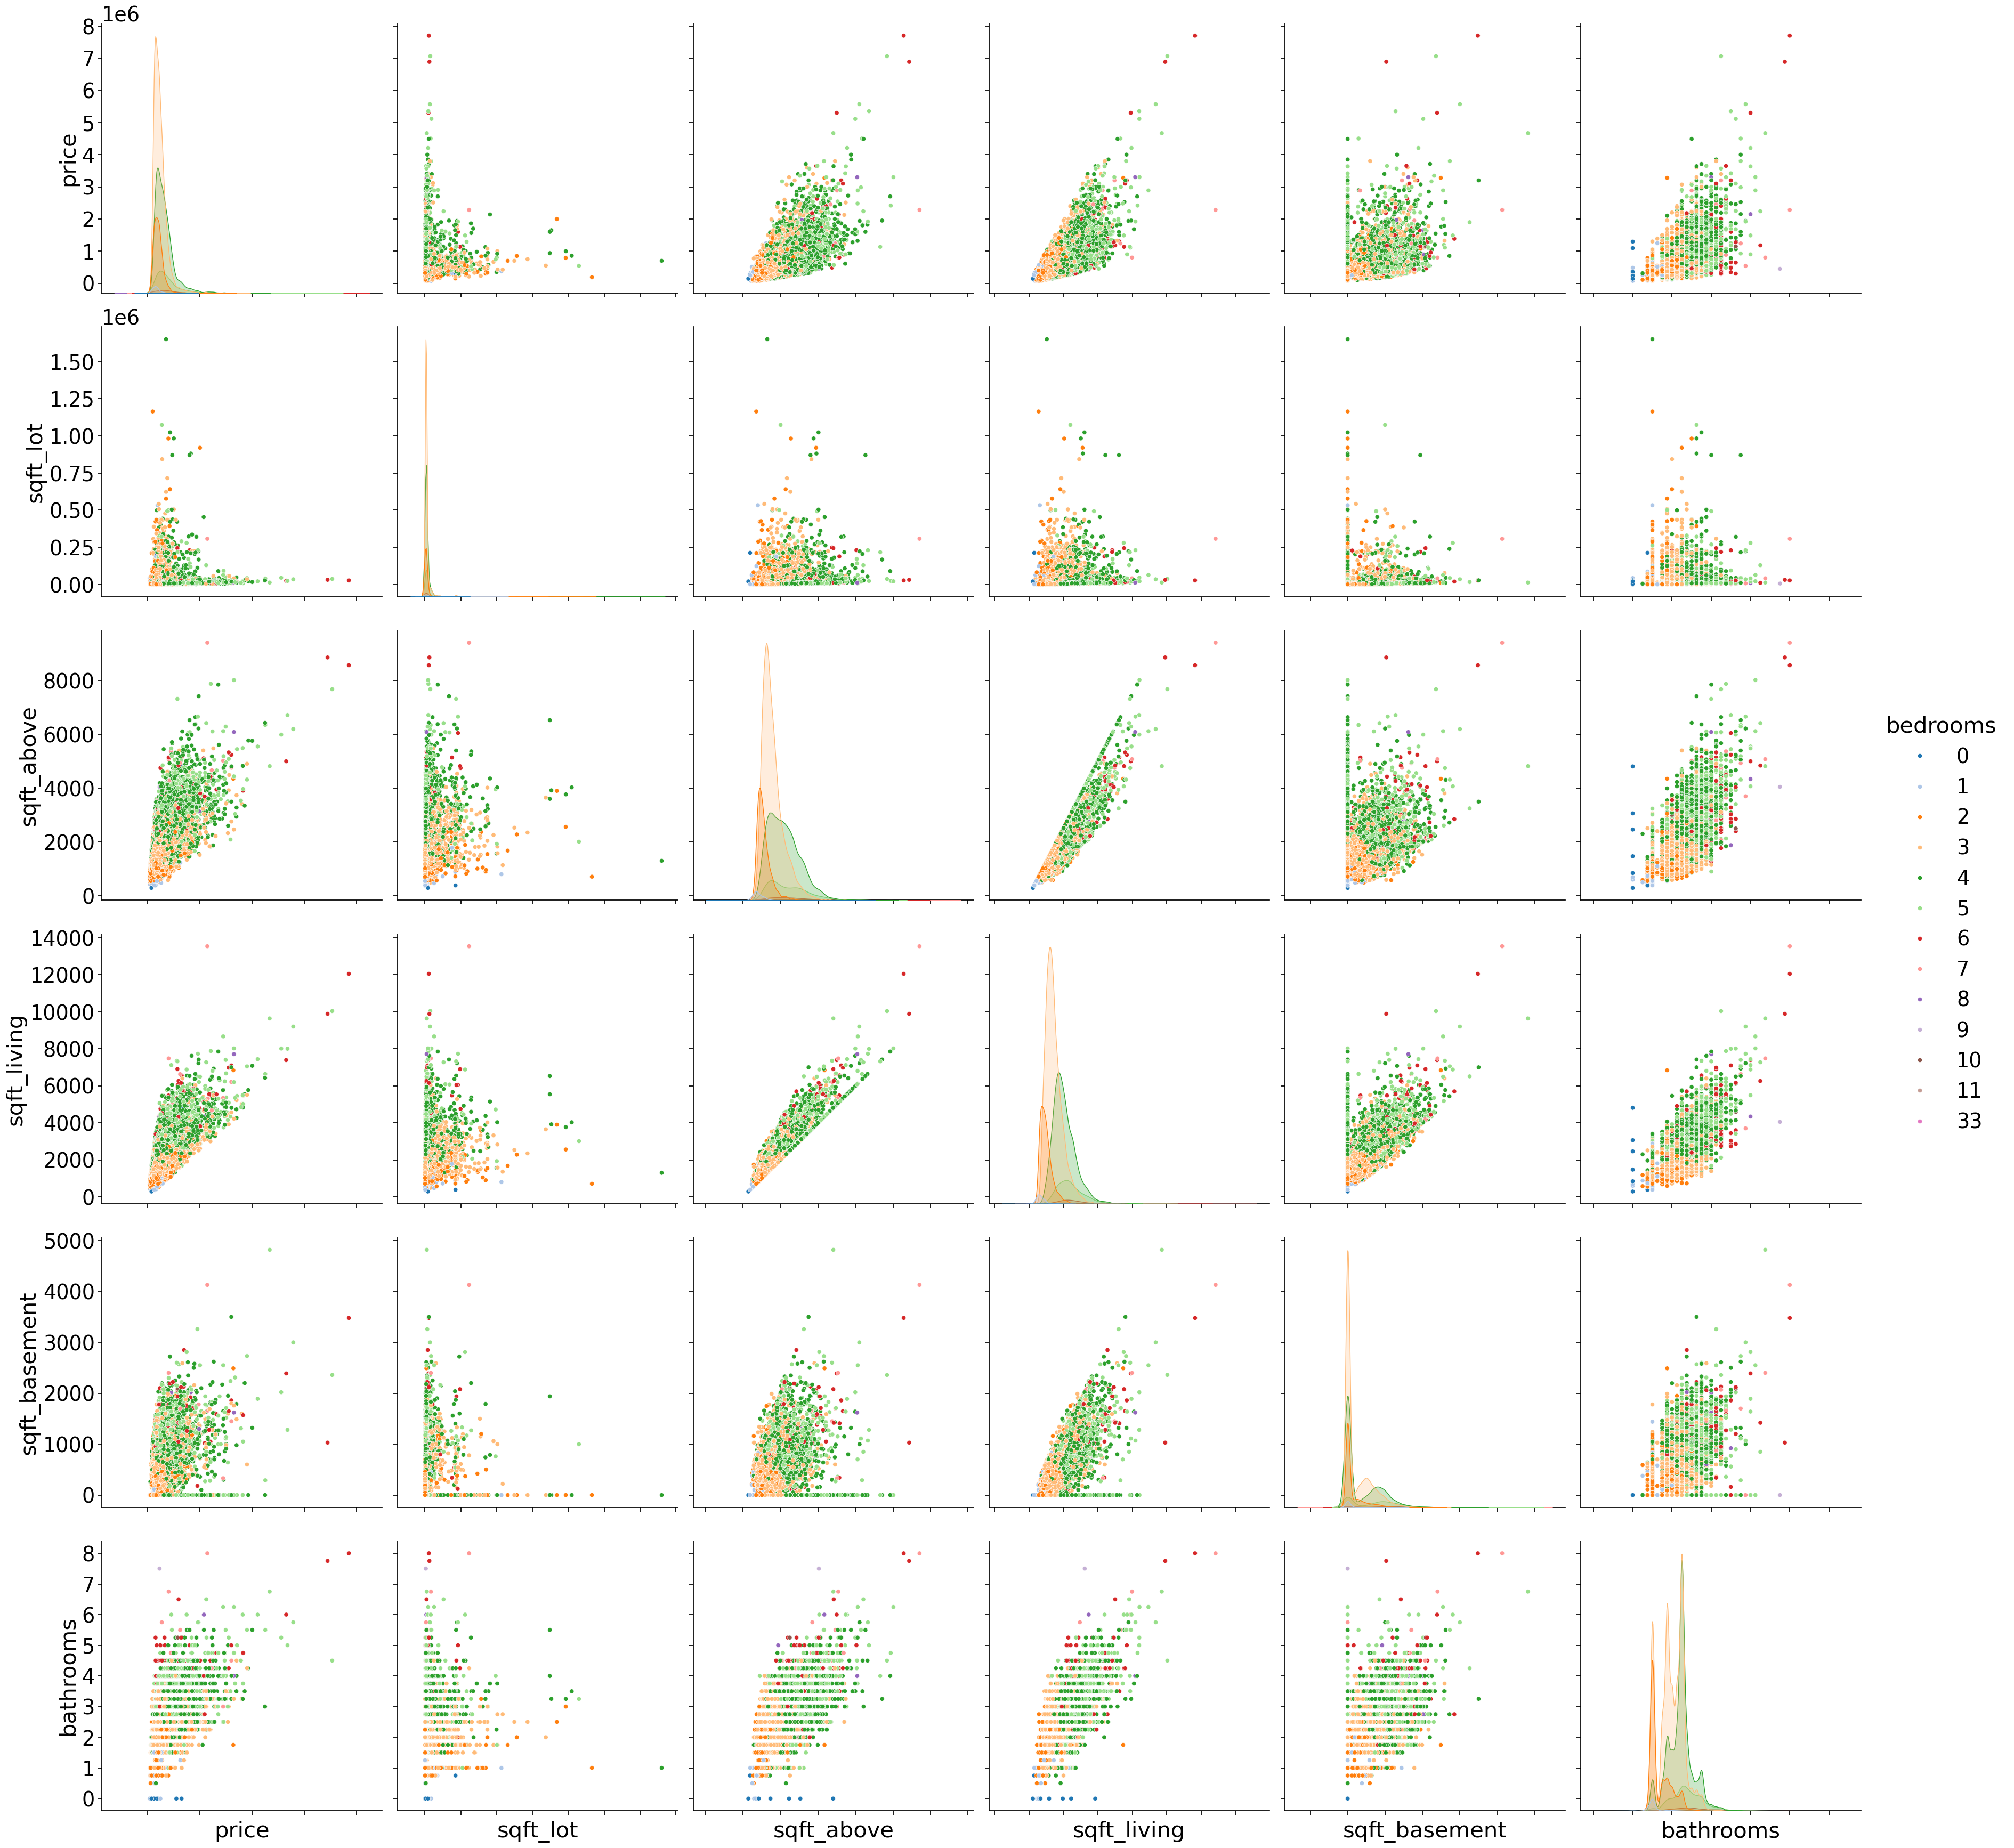

In [30]:
# Create a pairplots visualization
with sns.plotting_context("notebook", font_scale = 2.5):
    g = sns.pairplot(housing[['price', 'sqft_lot', 'sqft_above', 'sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms']], 
                 hue = 'bedrooms', palette = 'tab20', height = 6)
g.set(xticklabels=[]);

In [9]:
# Write housing file to a JSON data set
housing_cleaned.to_json('housing_cleaned.json', orient = 'records', lines = True)

# Write cleaned housing file to a csv file
housing_cleaned.to_csv('housing_cleaned.csv')

In [10]:
from sklearn.preprocessing import StandardScaler


# Define columns
#We split the variables into 
ordinal_cols = ['condition', 'grade', 'view', 'floors']
numeric_cols = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
    'lat', 'long', 'sqft_living15', 'sqft_lot15'
]
target_col = 'price'

# Drop unnecessary columns
#Dropping date from the version for the neural net
housing_cleaned = housing_cleaned.drop(columns=['date'])  # if not used

# Treat zipcode as categorical integer - we are going to use learned embeddings later
housing_cleaned['zipcode'] = housing_cleaned['zipcode'].round().astype(int)

# Ensure ordinal columns are integers
housing_cleaned[ordinal_cols] = housing_cleaned[ordinal_cols].round().astype(int)

# Normalize numeric columns
scaler = StandardScaler()
housing_cleaned[numeric_cols] = scaler.fit_transform(housing_cleaned[numeric_cols])

# Save cleaned version for neural network
housing_cleaned.to_csv("housing_for_nn.csv", index=False)